# 6. 비지도 학습

## 6-3. 주성분 분석 PCA으로 차원 축소하기

### 차원, 차원 축소

- feature 하나하나가 데이터의 차원이 된다
- feature가 많으면 훈련 데이터에 쉽게 오버피팅된다
- 주성분 분석 Principal Component Analysis가 대표적인 차원 축소 알고리즘

### PCA Principal Component Analysis

- 널리 사용되는 차원 축소 기법 중 하나
- 데이터 분포를 최대한 보존하면서 데이터를 저차원으로 변환한다
- 기존의 변수를 조합하여 서로 연관이 없는 새로운 변수(PC, principal component)를 만들어낸다

PCA 클래스

In [23]:
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

(50, 10000)


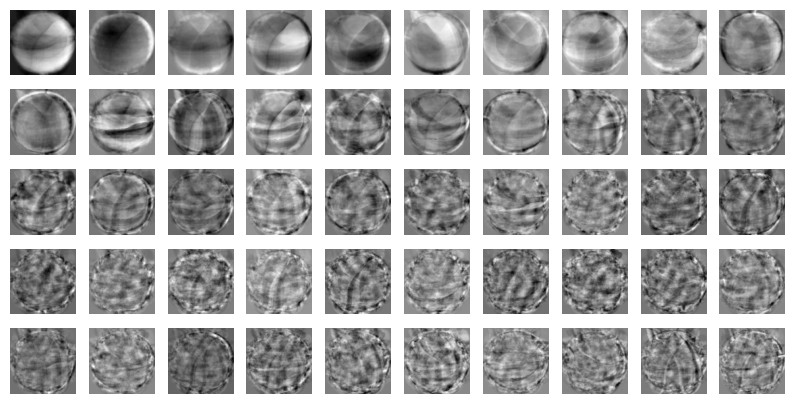

In [24]:
# PCA 클래스
from sklearn.decomposition import PCA
pca = PCA(n_components=50)
pca.fit(fruits_2d)

print(pca.components_.shape)

draw_fruits(pca.components_.reshape(-1, 100, 100))

원본 데이터 재구성

(300, 10000)


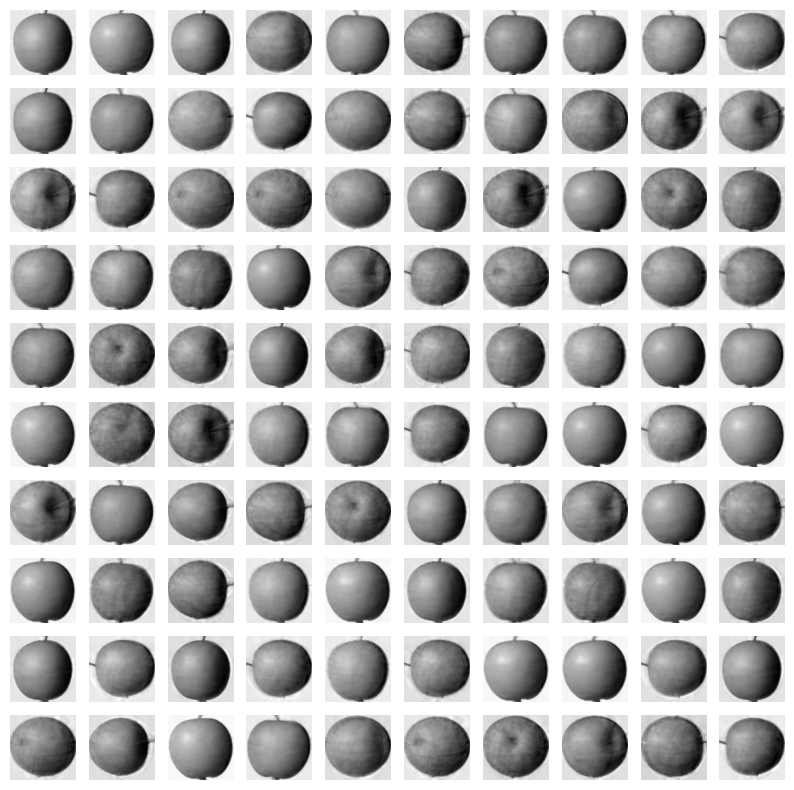

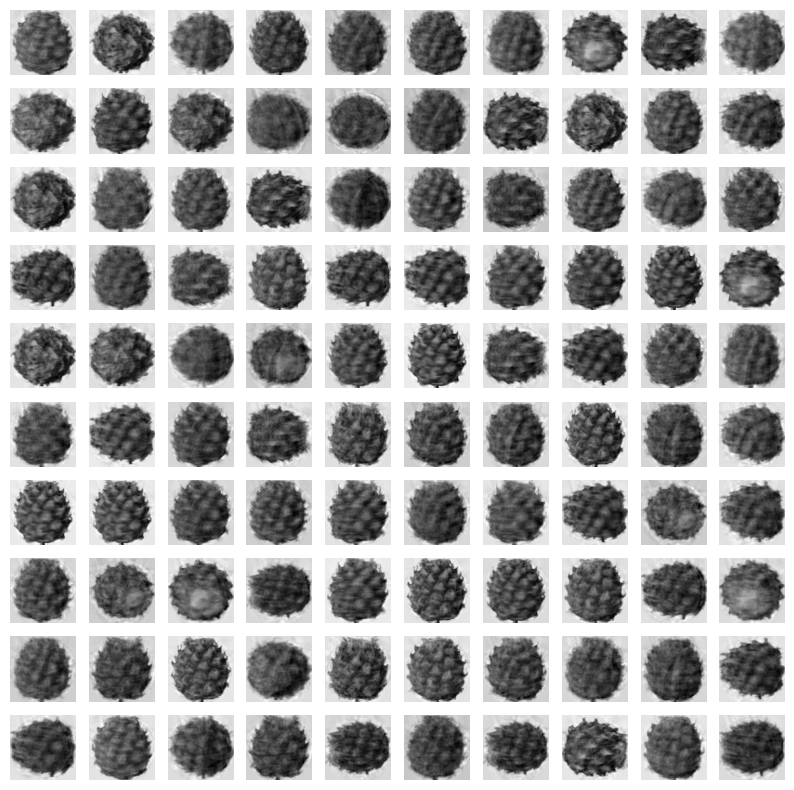

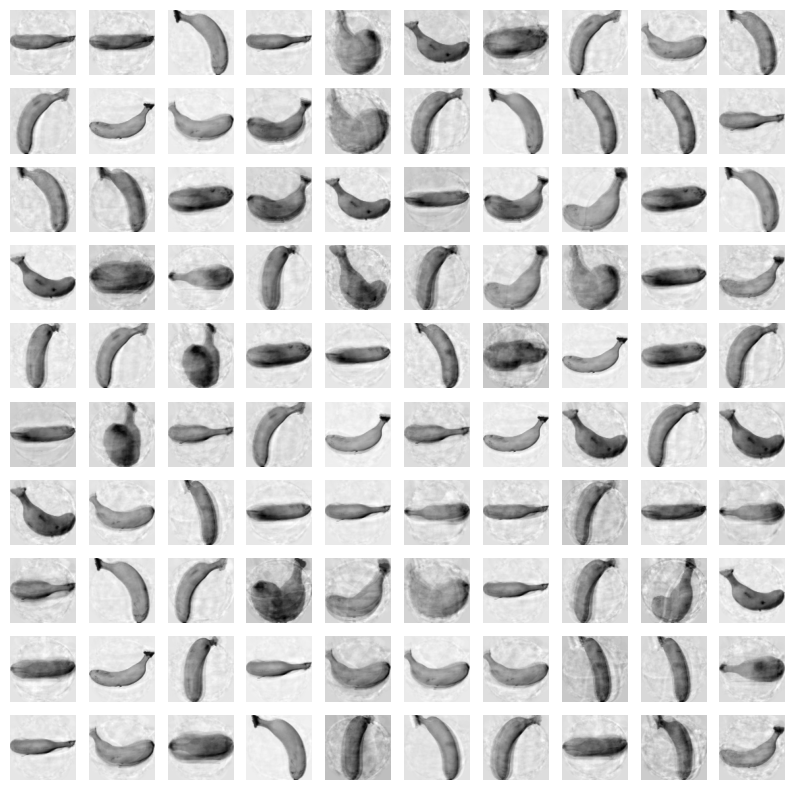

In [25]:
fruits_pca = pca.transform(fruits_2d)

fruits_inverse = pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

fruits_reconstruct = fruits_inverse.reshape(-1, 100, 100)
for start in [0, 100, 200]:
    draw_fruits(fruits_reconstruct[start:start+100])
    print()

설명된 분산: 주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값

0.9215172267796036


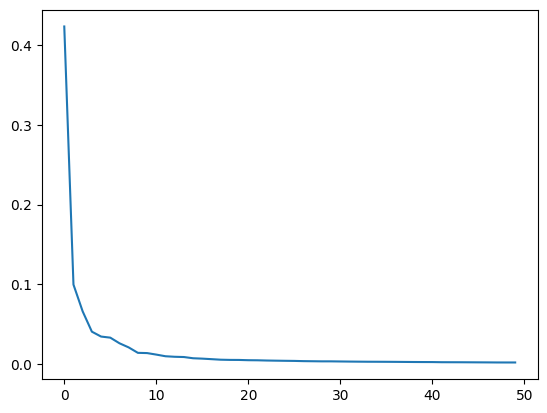

In [26]:
print(np.sum(pca.explained_variance_ratio_))

plt.plot(pca.explained_variance_ratio_)
plt.show()

다른 알고리즘과 함께 사용하기

In [27]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

target = np.array([0]*100 + [1]*100 + [2]*100)

from sklearn.model_selection import cross_validate
scores = cross_validate(lr, fruits_2d, target)
print(np.mean(scores["test_score"]))
print(np.mean(scores["fit_time"]))

0.9966666666666667
0.7626250267028809
